# Demonstrate fNIRS NIRx Capabilities in MNE

In [14]:
%matplotlib notebook

import os.path as op
import numpy as np
from mne.io import read_raw_nirx
import matplotlib.pyplot as plt

In [15]:
raw = read_raw_nirx('/home/rluke/Documents/Data/2019-08-06_001', preload=True);

Loading /home/rluke/Documents/Data/2019-08-06_001
Reading 0 ... 16252  =      0.000 ...  4160.512 secs...


<ipython-input-15-a1c9cc50970b>:1: RuntimeWarning: 72 channel names are too long, have been truncated to 15 characters:
['S10-D10 760 (nm)', 'S10-D10 850 (nm)', 'S10-D11 760 (nm)', 'S10-D11 850 (nm)', 'S10-D12 760 (nm)', 'S10-D12 850 (nm)', 'S11-D10 760 (nm)', 'S11-D10 850 (nm)', 'S11-D11 760 (nm)', 'S11-D11 850 (nm)', 'S11-D12 760 (nm)', 'S11-D12 850 (nm)', 'S11-D13 760 (nm)', 'S11-D13 850 (nm)', 'S12-D10 760 (nm)', 'S12-D10 850 (nm)', 'S12-D11 760 (nm)', 'S12-D11 850 (nm)', 'S12-D14 760 (nm)', 'S12-D14 850 (nm)', 'S12-D15 760 (nm)', 'S12-D15 850 (nm)', 'S13-D10 760 (nm)', 'S13-D10 850 (nm)', 'S13-D11 760 (nm)', 'S13-D11 850 (nm)', 'S13-D12 760 (nm)', 'S13-D12 850 (nm)', 'S13-D14 760 (nm)', 'S13-D14 850 (nm)', 'S13-D15 760 (nm)', 'S13-D15 850 (nm)', 'S13-D16 760 (nm)', 'S13-D16 850 (nm)', 'S14-D10 760 (nm)', 'S14-D10 850 (nm)', 'S14-D11 760 (nm)', 'S14-D11 850 (nm)', 'S14-D12 760 (nm)', 'S14-D12 850 (nm)', 'S14-D13 760 (nm)', 'S14-D13 850 (nm)', 'S14-D14 760 (nm)', 'S14-D14 850 (nm)',

<IPython.core.display.Javascript object>


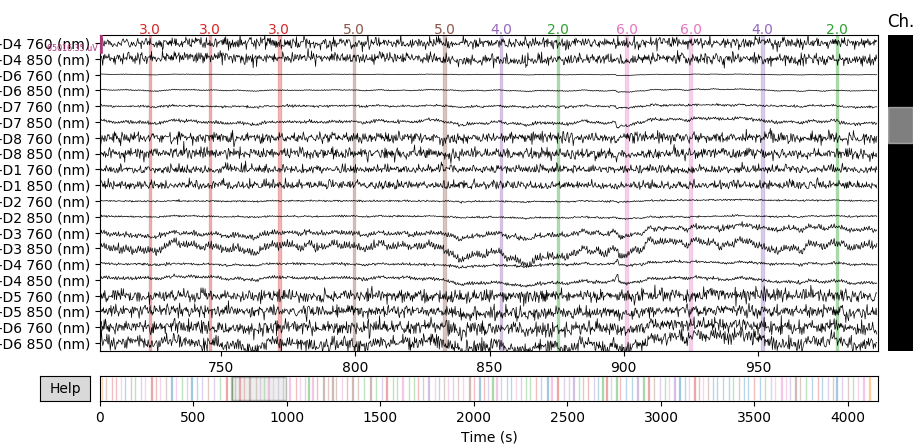

In [16]:
raw.plot(duration=290, block=True, start=0, scalings = 'auto');

<IPython.core.display.Javascript object>


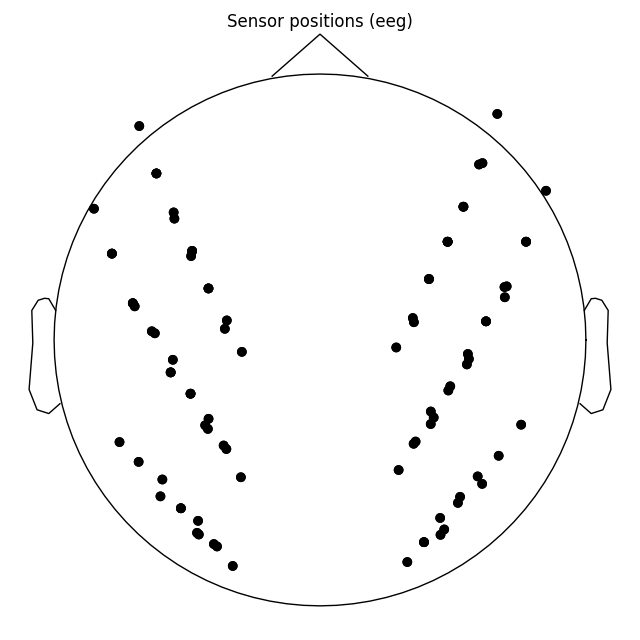

In [17]:
raw.plot_sensors(ch_type='eeg');

<IPython.core.display.Javascript object>


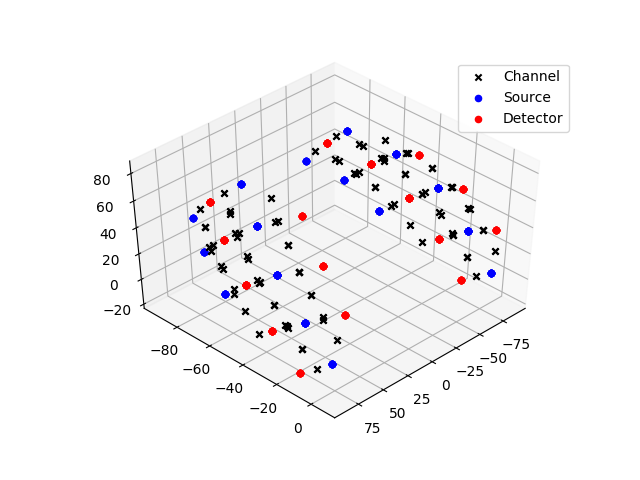

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(len(raw.info['chs'])):

    if idx == 1: label = 'Channel'; 
    else: label = ''
    ax.scatter(raw.info['chs'][idx]['loc'][0], 
               raw.info['chs'][idx]['loc'][1], 
               raw.info['chs'][idx]['loc'][2],
               marker = 'x', edgecolors='k', color='k', label=label)
    
    if idx == 1: label = 'Source'; 
    else: label = ''
    ax.scatter(raw.info['chs'][idx]['loc'][3], 
               raw.info['chs'][idx]['loc'][4], 
               raw.info['chs'][idx]['loc'][5],
               marker = 'o', edgecolors='b', color='b', label=label)
    
    if idx == 1: label = 'Detector'; 
    else: label = ''
    ax.scatter(raw.info['chs'][idx]['loc'][6], 
               raw.info['chs'][idx]['loc'][7], 
               raw.info['chs'][idx]['loc'][8],
               marker = 'o', edgecolors='r', color='r', label=label)
    
ax.view_init(45, 45)
ax.legend()

plt.show()

In [18]:
# Confirm we have no short channels
any(raw._short_channels())

False